# Nota de Estudo — Movimento Longitudinal da Motocicleta - Normais, Fracionamento da Energia e Fatores de Utilização

> **Autor:** Fábio Magnani (fabio.magnani@ufpe.br)  
> **Curso:** Engenharia Mecânica - UFPE  
> **Início do desenvolvimento:** 14/10/2025  
> **Primeira publicação:** 20/10/2025  
> **Versão Atual:** v-2025-10-20 (fase de teste técnico no Colab; uso pedagógico com estudantes e início da revisão final de código/texto)



---



## Objetivo

Partindos de um modelo básico da moto, acrescentar:   
    a) curva de motor um pouco mais detalhada,    
    b) vento e curva,    
    c) cálculo das normais nas duas rodas,   
    d) fator utilização da aderência e das normais,   
    e) consumo de combustível, e   
    f) fracionamento da energia.


## Referências

- Magnani, Fábio. “Física Básica das Motos”, 2020a.  
- Magnani, Fábio. “Solução Computacional do Movimento das Motos”, 2020b.  
- Magnani, Fábio. “O Motor da Moto”, 2020c.
- Magnani, Fábio. “Movimento Longitudinal da Motocicleta - Dinâmica Básica”, 2025.

## Principais simplificações

- Eficiência de transmissão 100%
- Rendimento do motor constante

## Estrutura

## Notação básica




## Simulação Dinâmica de Motocicleta

A Fig.1 mostra as forças atuando em uma motocicleta, sendo a propulsão à frente, e a frenagem, a resistência aerodinâmica, a resistência à rolagem e a ação da gravidade (no caso de subidas) resistindo ao movimento. O modelo deste *notebook* é apresentado em mais detalhes em Magnani (2025) e a teoria completa em Magnani (2025b).

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-moto-longitudinal-fig-01.png" alt="Balanço de forças na motocicleta" width="600" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 1.</b> Balanço de forças na motocicleta.</figcaption>
</figure>

Façamos um breve resumo. Aplicando a 2ª Lei de Newton (balanço de forças) na direção do movimento ($x$), chegamos a:

$$
\frac{\mathrm{d}V}{\mathrm{d}t}
= \alpha \,\frac{ P_{\max}}{m\,V}
- \beta_t\,\mu\, N_{rt}
- \beta_d\,\mu\, N_{rd}
- \frac{1}{2}\rho\, C_{D}\, A_{f}\,\frac{V^{2}}{m}
- C_{R}\, g \cos\theta
- g \sin\theta .
\tag{1}
$$


Onde:

$$
\begin{aligned}
t &: \text{ tempo (s)} \\
x &: \text{ posição (m)} \\
V &: \text{ velocidade (m/s)} \\
a &: \text{ aceleração longitudinal } (a=\mathrm{d}V/\mathrm{d}t) \\
m &: \text{ massa moto+piloto (kg)} \\
P_{\max} &: \text{ potência máxima do motor (W)} \\
\mu &: \text{ coeficiente de atrito pneu–pista} \\
\theta &: \text{ inclinação da pista (rad)} \\
\rho &: \text{ densidade do ar (kg/m}^3\text{)} \\
A_f &: \text{ área frontal (m}^2\text{)} \\
C_R &: \text{ coeficiente de resistência à rolagem} \\
C_D &: \text{ coeficiente de arrasto aerodinâmico} \\
\alpha &: \text{ fração de uso do motor em }[0,1] \\
\beta_t,\ \beta_d &: \text{ frações de uso de atrito traseiro/dianteiro em }[0,1] \\
N_{rt},\ N_{rd} &: \text{ Normais nas rodas traseira e dianteira (N)} \\
W &: \text{ velocidade do vento longitudinal (m/s, sinal no mesmo sentido de $V$)} \\
R_{\text{curva}} &: \text{ raio da curva (m)} \\
k_A &: \text{ parâmetro aerodinâmico } \left(k_A=\tfrac{1}{2}\rho C_D A_f\right)
\end{aligned}
$$

As normais são obtidas do balanço de forças em $y$ e do balanço de momentos em torno do contato entre o piso e o pneu traseiro:

$$
N_{rt} = m\, g \cos\theta 
\left(1 - \frac{p_{CG}}{p_d}\right)
+ \frac{m\, a\, h_{CG} + k_A (V - W)^2 h_{CP} + m\, g \sin\theta \, h_{CG}}{p_d},
\qquad
N_{rd} = m\, g \cos\theta \,\frac{p_{CG}}{p_d}
- \frac{m\, a\, h_{CG} + k_A (V - W)^2 h_{CP} + m\, g \sin\theta \, h_{CG}}{p_d}.
\tag{2–3}
$$

---

### Parâmetros numéricos usados no Caso Base

| Símbolo | Valor | Unidade | Faixa típica / Observação | Comentário sobre a escolha |
|---|---:|---|---|---|
| $α$  | 1.0 | – | 0–1 | Uso pleno do motor no caso-base. |
| $β_t$  | 0 | – | 0–1 | Sem frenagem traseira no trecho de aceleração. |
| $β_d$  | 0 | – | 0–1 | Sem frenagem dianteira no trecho de aceleração. |
| $m$ | 250 | kg | 180–300 | Moto+piloto+carga. |
| $μ$ | 0.8 | – | 0.6–1.0 | Aderência alta (asfalto seco). |
| $g$ | 9.81 | m/s² | 9.79–9.83 | Padrão SI. |
| $θ$  | 0 | rad | −0.15 a 0.15 | Trecho plano. |
| $ρ$ | 1.225 | kg/m³ | 1.1–1.3 | Nível do mar, 0–30 °C. |
| $C_D$ | 0.7 | – | 0.6–0.9 | Piloto ereto; não carenada. |
| $A_f$ | 0.7 | m² | 0.6–0.8 | Área frontal típica. |
| $C_R$ | 0.02 | – | 0.01–0.03 | Pneus em asfalto. | 
| $V_{0}$ | 0.01 | m/s | 0.01–0.5 | Evita singularidade em $P_{\max}/(mV)$. |
| $t_{0}$ | 0 | s | – | Início da simulação. |
| $t_f$ | 30 | s | 10–60 | Janela para atingir regime. |
| $h_{CG}$ | 0.72 | m | 0.6–0.8 | Altura do CG. |
| $h_{CP}$ | 0.95 | m | 0.8–1.1 | Altura do centro de pressão. |
| $p_d$ | 1.40 | m | 1.3–1.5 | Distância entre eixos. |
| $p_{CG}$ | 0.67 | m | 0.6–0.8 | Distância do CG ao eixo traseiro (ligeiramente atrás do centro). |
| $W$ | 0 | m/s | −10 a 10 | Vento longitudinal (caso-base: calmo). |
| $R_{\text{curva}}$ | 1e10 | m | 30–300 | No caso base, estamos usando R=$ \infty $, *i.e.*, uma reta.  |

---

## Potência do Motor

Usando um modelo simples que relaciona a potência com parâmetros básicos:

$$
P_{motor}(\omega) =
\begin{cases}
\eta_m \, \eta_{vol} \, \omega \, T_{ref}, & \omega < \omega_{red}\\[4pt]
0, & \omega \ge \omega_{red}
\end{cases}
\tag{4}
$$

com

$$
\begin{aligned}
T_{ref} & = \dfrac{1}{4\pi}\,V_{desl}\!\left(\dfrac{p_{a}}{R\,T_a}\right)
\dfrac{\sigma\,PC_{comb}\,M_{comb}}{\sigma+\lambda\,\gamma}, \qquad
\gamma = x+\dfrac{y}{4}-\dfrac{z}{2}, \qquad
M_{comb} = x\,M_C + y\,M_H + z\,M_O .
\end{aligned}
$$

A relação total de transmissão muda com a marcha $i_g$:

$$
i_{tot} = i_{primary}\; i_{final}\; i_g
$$

Temos então  a seguinte relação entre a velocidade e a rotação do motor:

$$
\omega = i_{tot}\,\frac{V}{R_{rod}}   \tag{5}
$$

### Parâmetros do modelo de potência

#### **1. Parâmetros atmosféricos**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|---|---|---|
| $p_a$ | Pressão absoluta do ar | 101 325 | Pa | 1 atm | Condição padrão ao nível do mar |
| $T_a$ | Temperatura do ar | 293.15 | K | 20 °C | Condição ambiente média |
| $R$ | Constante universal dos gases | 8.314 × 10⁰ | J/(mol·K) | – | Valor universal |
| $\sigma$ | Fração molar de O₂ no ar | 0.21 | – | 21 % | Atmosfera padrão |
| $\lambda$ | Fator de excesso de ar (razão ar/comb. real ÷ teórica) | 1.0 | – | – | Mistura estequiométrica |

---

#### **2. Parâmetros do motor**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|---|---|---|
| $V_{desl}$ | Volume deslocado total (cilindrada) | 3.00 × 10⁻⁴ | m³ | 300 cm³ | Moto de média cilindrada |
| $\eta_{vol}$ | Eficiência volumétrica | 0.90 | – | 90 % | Moto aspirada em regime médio |
| $\eta_m$ | Rendimento mecânico global | 0.30 | – | 30 % | Inclui perdas mecânicas e térmicas |
| $\omega_{red}$ | Rotação limite (redline) | 995 rad/s | rad/s | 9 500 rpm | A partir daqui a potência é anulada no modelo |
| $P_{motor}$ | Potência do motor (saída efetiva) | *calculada* | W | kW ou hp | Via equação $P=\eta_m \eta_{vol} \omega T_{ref}$ |

---

#### **3. Parâmetros do combustível (gasolina ≈ C₈H₁₈)**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|---|---|---|
| $x, y, z$ | Coeficientes estequiométricos (CₓH_yO_z) | 8, 18, 0 | – | – | Combustível genérico tipo gasolina |
| $M_C$ | Massa molar do carbono | 12.011 × 10⁻³ | kg/mol | 12.011 g/mol | – |
| $M_H$ | Massa molar do hidrogênio | 1.008 × 10⁻³ | kg/mol | 1.008 g/mol | – |
| $M_O$ | Massa molar do oxigênio | 15.999 × 10⁻³ | kg/mol | 15.999 g/mol | – |
| $M_{comb}$ | Massa molar da molécula de combustível | 0.11423 | kg/mol | 114.23 g/mol | Para C₈H₁₈ |
| $PC_{comb}$ | Poder calorífico inferior | 44.8 × 10⁶ | J/kg | 44.8 MJ/kg | Gasolina comercial |
| $\gamma$ | Termo auxiliar ($x + y/4 - z/2$) | 12.5 | – | – | Determina a proporção teórica de O₂ |


####  **4. Parâmetros da transmissão**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|:---|:---|:---|
| $R_{\text{rod}}$ | Raio efetivo da roda traseira | 0.30 | m | 300 mm | Raio dinâmico roda+pneu |
| $i_{\text{prim}}$ | Relação primária | 2.40 | – | – | Virabrequim → eixo de entrada |
| $i_{\text{marcha}}$ | Relações (1ª→5ª) | [2.50, 1.80, 1.40, 1.20, 1.00] | – | – | **Faixas típicas**: 1ª 2.2–2.8 (saída do zero); 2ª 1.6–2.1; 3ª 1.3–1.6; 4ª 1.1–1.3; 5ª 0.9–1.1 (muitas motos têm “overdrive” < 1). |
| $i_{\text{final}}$ | Relação final | 2.60 | – | – | Ex.: 3.20 “curta” (acelera melhor) vs 2.60 “longa” (Vmáx maior). |
| $i_{\text{tot}}$ | $i_{\text{prim}}\cdot i_{\text{marcha}}\cdot i_{\text{final}}$ | – | – | – | Multiplica torque/rotação entre motor e roda. |

---

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-moto-longitudinal-fig-02.png" alt="Balanço de forças na motocicleta" width="1200" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 2.</b> Balanço de forças na motocicleta.</figcaption>
</figure>



## Curva: forças laterais, resultantes de atrito e fatores de uso

**Força centrípeta total e divisão por eixo** (raio constante $R_{\text{curva}}$):

$$
F_{\text{cen}}=\frac{m\,V^2}{R_{\text{curva}}},\qquad
F_{\text{cen,d}}=\frac{m\,V^2}{R_{\text{curva}}}\,\frac{p_{CG}}{p_d},\qquad
F_{\text{cen,t}}=\frac{m\,V^2}{R_{\text{curva}}}\left(1-\frac{p_{CG}}{p_d}\right).
\tag{5}
$$

**Resultantes de atrito por roda** (combinação longitudinal–lateral):

$$
\bigl|F_{\text{at,d}}\bigr| = \sqrt{F_{\text{frn,d}}^{\,2}+F_{\text{cen,d}}^{\,2}},\qquad
\bigl|F_{\text{at,t}}\bigr| = \sqrt{(F_{\text{pro}}+F_{\text{frn,t}})^{2}+F_{\text{cen,t}}^{\,2}} .
\tag{6}
$$

**Capacidade disponível de atrito** (círculo/elipse de atrito):

$$
\bigl|F_{\text{disp,d}}\bigr|=\mu\,N_{rd},\qquad
\bigl|F_{\text{disp,t}}\bigr|=\mu\,N_{rt}.
\tag{7}
$$

### Fatores de uso (reformulados como **margens** $\epsilon$)

Definimos margens $\epsilon$ tais que **$\epsilon<0$ indica condição ruim/excedida**:

- **Aderência** (quanto falta para saturar o atrito em cada roda):
$$
\epsilon_{\text{ad,d}} = 1-\frac{\bigl|F_{\text{at,d}}\bigr|}{\bigl|F_{\text{disp,d}}\bigr|} \tag{8}
$$

$$
\epsilon_{\text{ad,t}} = 1-\frac{\bigl|F_{\text{at,t}}\bigr|}{\bigl|F_{\text{disp,t}}\bigr|} \tag{9}
$$

- **Normal** (quanto falta para perder contato/transferência crítica)**:** seja $N_{\text{est,d}}=m\,g\cos\theta\,\dfrac{p_{CG}}{p_d}$ e $N_{\text{est,t}}=m\,g\cos\theta\,\left(1-\dfrac{p_{CG}}{p_d}\right)$ as normais **estáticas puras** (sem inércia/arrasto). Então

$$
\epsilon_{\text{no,d}}=\frac{N_{rd}}{N_{\text{est,d}}} \tag{10}
$$

$$
\epsilon_{\text{no,t}}=\frac{N_{rt}}{N_{\text{est,t}}} \tag{11}
$$

Interpretação: $\epsilon=0$ está “no limite”; $\epsilon>0$ há folga; $\epsilon<0$ indica **excedeu** (por exemplo, atrito saturado ou normal reduzida demais), útil para mapas de risco em curvas e frenagens.

### Potências instantâneas e autonomia

**Forças**
$$F_{\text{pro}}=\frac{P_{\text{motor}}(\omega)}{V},\qquad
F_{\text{aer}}=\tfrac12\,\rho\,C_D\,A_f\,V^2,\qquad
F_{\text{rol}}=C_R\,m\,g\cos\theta,$$
$$F_{\text{grav}}=m\,g\sin\theta,\qquad
F_{\text{frn}}=F_{\text{frn,d}}+F_{\text{frn,t}}\;\;(\text{se houver}).$$

**Potências**
$$P_{\text{iner}}=m\,V\,\frac{\mathrm d V}{\mathrm d t},\qquad
P_{\text{pro}}=F_{\text{pro}}\,V=P_{\text{motor}}(\omega),$$
$$P_{\text{aer}}=F_{\text{aer}}\,V=\tfrac12\,\rho\,C_D\,A_f\,V^3,\qquad
P_{\text{rol}}=F_{\text{rol}}\,V=C_R\,m\,g\cos\theta\,V,$$
$$P_{\text{grav}}=F_{\text{grav}}\,V=m\,g\sin\theta\,V,\qquad
P_{\text{frn}}=F_{\text{frn}}\,V.$$

**Balanço**
$$P_{\text{pro}}=P_{\text{iner}}+P_{\text{aer}}+P_{\text{rol}}+P_{\text{grav}}+P_{\text{frn}}.$$


**Autonomia instantânea (km/L)**  

$$P_{\text{comb}}=\frac{P_{\text{motor}}}{\eta_{\text{m}}},\qquad
\dot m_{\text{comb}}=\frac{P_{\text{quim}}}{PC_{\text{comb}}}
=\frac{P_{\text{motor}}}{\eta_{\text{m}}\,PC_{\text{comb}}},$$
$$\dot V_{\text{comb}}=\frac{\dot m_{\text{comb}}}{\rho_{\text{comb}}}
=\frac{P_{\text{motor}}}{\eta_{\text{m}}\,PC_{\text{comb}}\,\rho_{\text{comb}}}\;[\text{L/s}],$$
$$\mathcal{A}_{\text{inst}}[\text{km/L}]
=\frac{V}{1000\,\dot V_{\text{comb}}}
=\frac{\eta_{\text{m}}\,PC_{\text{comb}}\,\rho_{\text{comb}}}{1000}\,
\frac{V}{P_{\text{motor}}(\omega)}.$$


V_final = 37.91 m/s  (136.5 km/h)


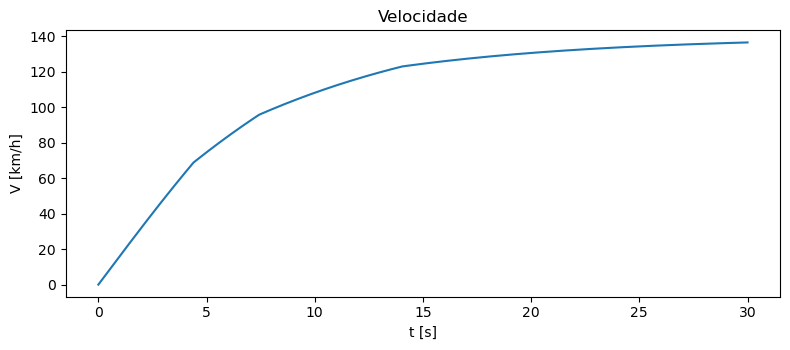

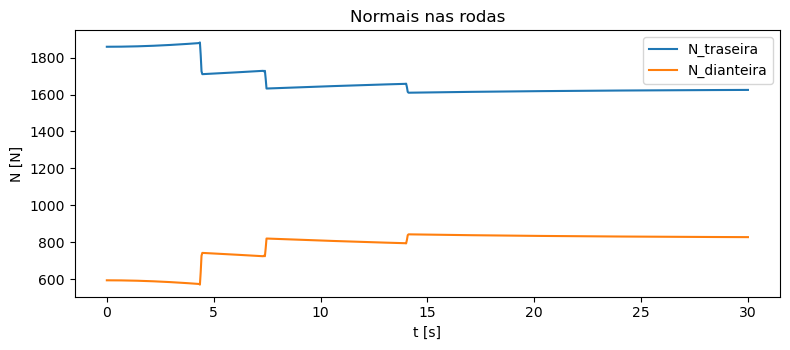

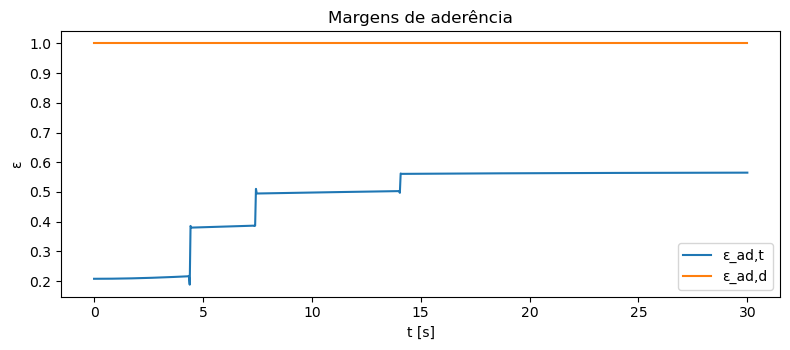

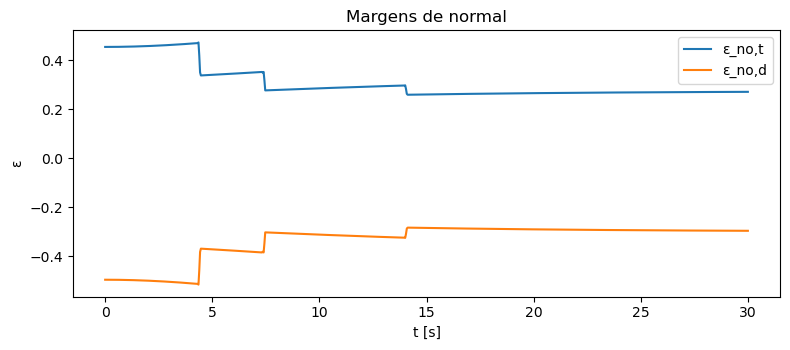

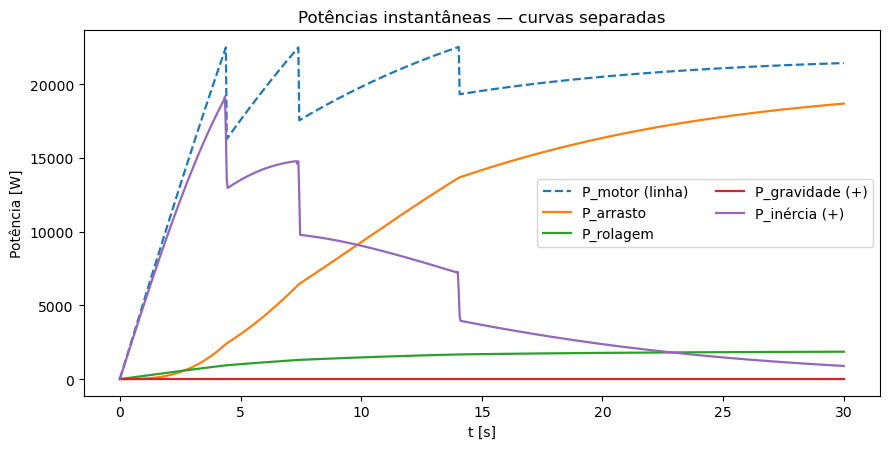

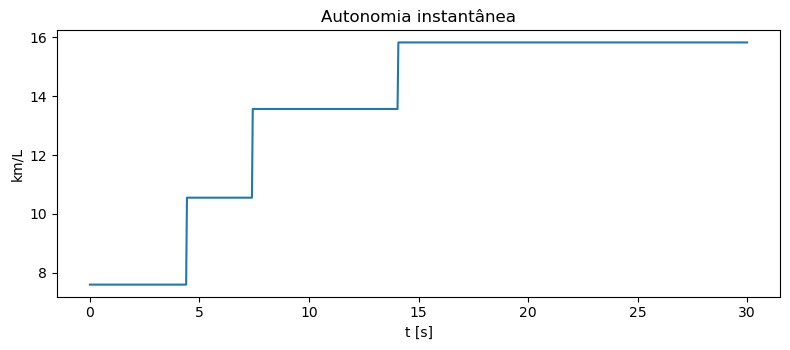

In [13]:
# ============================================================
# Simulação + Pós-processamento em UMA execução
# - dV/dt genérico (mu, beta_t, beta_d, normais)
# - motor P(ω) com redline e seleção automática de marcha
# - curvas separadas de potência (sem empilhar) + autonomia
# ============================================================

import numpy as np                              # NumPy para vetores/matrizes
from scipy.integrate import solve_ivp           # solve_ivp: integrador de EDO
import matplotlib.pyplot as plt                 # Matplotlib para gráficos

# ------------------------------
# 1) Parâmetros do veículo/ambiente
# ------------------------------
m      = 250.0      # kg   | massa total (moto + piloto)
g      = 9.81       # m/s² | aceleração da gravidade
theta  = 0.0        # rad  | inclinação da pista (0 = plano)
rho    = 1.225      # kg/m³| densidade do ar (nível do mar)
C_D    = 0.70       # -    | coeficiente de arrasto aerodinâmico
A_f    = 0.80       # m²   | área frontal efetiva
C_R    = 0.020      # -    | coeficiente de resistência à rolagem
alpha  = 1.0        # -    | fração de uso do motor (0 a 1)
mu     = 0.80       # -    | coeficiente de atrito pneu-pista
beta_t = 0.0        # -    | fração do atrito disponível usada na traseira (frenagem)
beta_d = 0.0        # -    | fração do atrito disponível usada na dianteira (frenagem)
R_rod  = 0.30       # m    | raio efetivo da roda traseira
V_eps  = 1e-2       # m/s  | epsilon para evitar divisão por zero em P/V
W      = 0.0        # m/s  | vento longitudinal (sinal conforme V)
k_A    = 1/2 * rho * C_D * A_f  # N·s²/m⁴ | parâmetro aerodinâmico (½ ρ C_D A_f)

# Geometria (CG = centro de gravidade; CP = centro de pressão)
h_CG, h_CP = 0.72, 0.95   # m | alturas do CG e do CP
p_d, p_CG  = 1.40, 0.67   # m | entre-eixos total e distância CG→eixo traseiro

# Curvatura (R_curva muito grande ≈ movimento retilíneo)
R_curva = 1.0e10  # m

# Tempo de simulação
t0, tf = 0.0, 30.0                       # s | intervalo de integração
t_eval = np.linspace(t0, tf, 800)        # pontos de avaliação para saída suave

# ------------------------------
# 2) Transmissão (um caso)
# ------------------------------
i_primary = 2.40                                        # - | relação primária
i_gears   = np.array([2.50, 1.80, 1.40, 1.20, 1.00])    # - | 1ª..5ª marchas
i_final   = 2.60                                        # - | relação final
i_totals  = i_primary * i_final * i_gears               # - | relações totais por marcha

# ------------------------------
# 3) Modelo de potência do motor P(ω)
# ------------------------------
V_desl = 300e-6          # m³   | cilindrada total
p_a    = 101325.0        # Pa   | pressão do ar
T_a    = 293.15          # K    | temperatura do ar
eta_vol = 0.90           # -    | eficiência volumétrica
eta_m   = 0.30           # -    | rendimento mecânico global
sigma   = 0.21           # -    | fração molar de O2 no ar
lam     = 1.0            # -    | fator de excesso de ar (estequiométrico)
R       = 8.314462618    # J/mol/K | constante universal dos gases

# Combustível ~ C8H18 (gasolina)
x, y, z = 8, 18, 0                               # - | estequiometria
PC_comb = 44.8e6                                 # J/kg | PCI
M_C, M_H, M_O = 12.011e-3, 1.008e-3, 15.999e-3   # kg/mol | massas molares
M_comb = x*M_C + y*M_H + z*M_O                   # kg/mol | massa molar do combustível

rpm_redline = 9500.0                             # rpm   | redline
w_redline   = rpm_redline * 2*np.pi/60.0         # rad/s | redline em rad/s

def pmotor(omega):
    """Retorna P_motor(ω) [W] com corte no redline (ω escalar ou array)."""
    gamma = x + y/4 - z/2                                                # termo auxiliar
    T_ref = (1/(4*np.pi)) * V_desl * (p_a/(R*T_a)) * (sigma*PC_comb*M_comb) / (sigma + lam*gamma)
    w = np.asarray(omega, float)                                         # garante array NumPy
    w_eff = np.where(w < w_redline, w, 0.0)                              # zera acima do redline
    return eta_m * eta_vol * w_eff * T_ref                               # W

def power_from_speed(V):
    """Seleciona a marcha com maior ω < redline e retorna P_motor(V)."""
    omegas = i_totals * (V / R_rod)        # rad/s | ω por marcha na velocidade V
    valid = np.where(omegas < w_redline)[0]# marchas válidas (não estouram redline)
    if valid.size == 0:                    # acima da Vmáx da 5ª marcha
        return 0.0
    k = valid[np.argmax(omegas[valid])]    # marcha que dá ω válido mais alto
    return pmotor(omegas[k])               # potência disponível nessa marcha

# Versão vetorizada para pós-processamento
power_from_speed_vec = np.vectorize(power_from_speed)

# ------------------------------
# 4) EDO dV/dt (genérica)
# ------------------------------
def dVdt(t, y):
    V = max(y[0], 0.0)                         # impõe V ≥ 0
    Veff = V if V > V_eps else V_eps           # evita divisão por zero em P/V

    # Propulsão disponível
    P_av  = power_from_speed(V)                # W | potência do motor para V
    F_prop = alpha * P_av / Veff               # N | força propulsiva efetiva

    # Normais aproximadas (sem termo inercial m*a*h_CG no ODE para simplicidade)
    N_rt = m*g*np.cos(theta)*(1 - p_CG/p_d) + (k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d
    N_rd = m*g*np.cos(theta)*(p_CG/p_d)     - (k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d

    # Frenagem longitudinal (se beta_* > 0): limita pela disponibilidade de atrito
    F_fren = beta_t*mu*N_rt + beta_d*mu*N_rd   # N | soma das contribuições

    # Resistências
    F_aer  = 0.5 * rho * C_D * A_f * V*V       # N | arrasto
    F_rol  = C_R * m * g * np.cos(theta)       # N | rolagem (aprox. constante)
    F_grav = m * g * np.sin(theta)             # N | gravidade (rampa)

    # dV/dt = (Σ forças) / m
    return [(F_prop - F_aer - F_rol - F_grav - F_fren) / m]

# ------------------------------
# 5) Integra
# ------------------------------
V0 = 0.01  # m/s | velocidade inicial (quase parado)
sol = solve_ivp(dVdt, (t0, tf), [V0], t_eval=t_eval, max_step=0.05)  # integra EDO
V = sol.y[0]; t = sol.t                                              # extrai V(t) e malha t
print(f"V_final = {V[-1]:.2f} m/s  ({3.6*V[-1]:.1f} km/h)")          # diagnóstico rápido

# ------------------------------
# 6) Pós-processamento
# ------------------------------
# Rotação e potência realmente usadas ao longo do tempo (com seleção de marcha)
omegas_all = np.outer(i_totals, V / R_rod)                                      # ω por marcha × tempo
valid_mask = omegas_all < w_redline                                             # máscara de validade
idx = np.argmax(np.where(valid_mask, omegas_all, -np.inf), axis=0)              # marcha escolhida
omega_sel = omegas_all[idx, np.arange(omegas_all.shape[1])]                     # ω selecionada
P_motor = alpha * pmotor(omega_sel)                                             # W | potência efetiva

# Forças longitudinais instantâneas
F_prop = P_motor / np.maximum(V, V_eps)                                         # N | propulsão
F_aer  = 0.5 * rho * C_D * A_f * V**2                                           # N | arrasto
F_rol  = C_R * m * g * np.cos(theta)                                            # N | rolagem
F_grav = m * g * np.sin(theta)                                                  # N | gravidade

# Normais REFINADAS (agora com termo inercial m*a*h_CG)
a = np.gradient(V, t, edge_order=2)                                             # m/s² | aceleração
N_rt = m*g*np.cos(theta)*(1 - p_CG/p_d) + (m*a*h_CG + k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d
N_rd = m*g*np.cos(theta)*(p_CG/p_d)     - (m*a*h_CG + k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d

# Frenagem efetiva (no caso base, beta_* = 0 → zero)
F_fren = beta_t*mu*N_rt + beta_d*mu*N_rd                                        # N

# Curva (se quiser avaliar margens laterais; aqui R_curva enorme → ~0)
F_cen_d = m*V**2/R_curva*(p_CG/p_d)                                             # N | demanda lateral dianteira
F_cen_t = m*V**2/R_curva*(1 - p_CG/p_d)                                         # N | demanda lateral traseira

# Resultantes de atrito e capacidades disponíveis
F_fat_d = np.sqrt((0.0)**2 + F_cen_d**2)                                        # N | dianteira (sem tração)
F_fat_t = np.sqrt((F_prop - F_fren)**2 + F_cen_t**2)                             # N | traseira
F_disp_d = mu * N_rd                                                             # N | capacidade dianteira
F_disp_t = mu * N_rt                                                             # N | capacidade traseira

# Margens (ε): >0 folga; <0 excedeu
eps_ad_d = 1 - np.abs(F_fat_d)/np.maximum(np.abs(F_disp_d), 1e-9)                # aderência dianteira
eps_ad_t = 1 - np.abs(F_fat_t)/np.maximum(np.abs(F_disp_t), 1e-9)                # aderência traseira
N_est_d = m*g*np.cos(theta)*(p_CG/p_d)                                           # N | normal estática dianteira
N_est_t = m*g*np.cos(theta)*(1 - p_CG/p_d)                                       # N | normal estática traseira
eps_no_d = N_rd/np.maximum(N_est_d, 1e-9) - 1                                    # margem de normal dianteira
eps_no_t = N_rt/np.maximum(N_est_t, 1e-9) - 1                                    # margem de normal traseira

# Potências (curvas separadas; positivas indicam demanda)
P_iner = m * V * a                                                               # W | inércia (pode ser ±)
P_aer  = F_aer * V                                                               # W | arrasto
P_rol  = F_rol * V                                                               # W | rolagem
P_grav = F_grav * V                                                              # W | gravidade (±)
P_fren = F_fren * V                                                              # W | frenagem (+ se ativa)
P_iner_pos = np.maximum(P_iner, 0.0)                                             # W | parte positiva (demanda)
P_grav_pos = np.maximum(P_grav, 0.0)                                             # W | parte positiva (subida)

# Autonomia instantânea (km/L) usando η_th ≈ η_m * η_vol
eta_th   = eta_m * eta_vol                                                       # - | rendimento térmico aprox.
rho_comb = 0.74                                                                  # kg/L | densidade gasolina
A_inst   = (eta_th * PC_comb * rho_comb / 1000.0) * V / np.maximum(P_motor, 1.0)# km/L | autonomia instantânea

# ------------------------------
# 7) Gráficos
# ------------------------------
# Velocidade
plt.figure(figsize=(8,3.6))
plt.plot(t, V*3.6)
plt.xlabel('t [s]'); plt.ylabel('V [km/h]'); plt.title('Velocidade')
plt.tight_layout(); plt.show()

# Normais
plt.figure(figsize=(8,3.6))
plt.plot(t, N_rt, label='N_traseira')
plt.plot(t, N_rd, label='N_dianteira')
plt.xlabel('t [s]'); plt.ylabel('N [N]'); plt.title('Normais nas rodas'); plt.legend()
plt.tight_layout(); plt.show()

# Margens de aderência
plt.figure(figsize=(8,3.6))
plt.plot(t, eps_ad_t, label='ε_ad,t')
plt.plot(t, eps_ad_d, label='ε_ad,d')
plt.xlabel('t [s]'); plt.ylabel('ε'); plt.title('Margens de aderência'); plt.legend()
plt.tight_layout(); plt.show()

# Margens de normal
plt.figure(figsize=(8,3.6))
plt.plot(t, eps_no_t, label='ε_no,t')
plt.plot(t, eps_no_d, label='ε_no,d')
plt.xlabel('t [s]'); plt.ylabel('ε'); plt.title('Margens de normal'); plt.legend()
plt.tight_layout(); plt.show()

# Potências (curvas separadas, sem empilhar)
plt.figure(figsize=(9,4.6))
plt.plot(t, P_motor, '--', lw=1.6, label='P_motor (linha)')
plt.plot(t, P_aer,          lw=1.6, label='P_arrasto')
plt.plot(t, P_rol,          lw=1.6, label='P_rolagem')
plt.plot(t, P_grav_pos,     lw=1.6, label='P_gravidade (+)')
plt.plot(t, P_iner_pos,     lw=1.6, label='P_inércia (+)')
if np.any(P_fren > 0):
    plt.plot(t, np.maximum(P_fren,0.0), lw=1.6, label='P_frenagem (+)')
plt.xlabel('t [s]'); plt.ylabel('Potência [W]')
plt.title('Potências instantâneas — curvas separadas')
plt.legend(loc='best', ncols=2)
plt.tight_layout(); plt.show()

# Autonomia
plt.figure(figsize=(8,3.6))
plt.plot(t, A_inst)
plt.xlabel('t [s]'); plt.ylabel('km/L'); plt.title('Autonomia instantânea')
plt.tight_layout(); plt.show()
